In [7]:
import pandas as pd
df = pd.read_csv("hour.csv")

In [8]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['instant', 'dteday', 'casual', 'registered', 'cnt'],axis="columns"), df['cnt'], test_size = 0.1, random_state = 42)
# here the data was splitted ito two sets by using the test train split
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
6025,3,0,9,15,0,2,1,1,0.74,0.6667,0.51,0.2985
2858,2,0,5,0,0,3,1,3,0.52,0.5000,0.77,0.1642
7078,4,0,10,13,0,4,1,2,0.50,0.4848,0.88,0.1642
15855,4,1,10,20,0,6,0,2,0.52,0.5000,0.72,0.2239
16873,4,1,12,20,0,1,1,1,0.46,0.4545,0.88,0.2537


In [53]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=50,n_estimators = 30,min_samples_split = 2)
model.fit(X_train, y_train)

,n_estimators,30
,criterion,'squared_error'
,max_depth,50
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
predicted = model.predict(X_test)
# The model uses X_test to make predictions internally,
# then compares them to y_test.
result = model.score(X_test, y_test)

print(f"R2 Score: {result:.4f}")

R2 Score: 0.9433


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# --- 1. Discretize Data (Convert continuous counts to binary classes) ---
# Calculate the median of the true counts to use as a threshold
median_count = np.median(y_test)

# Convert actual and predicted continuous values into discrete classes (0 or 1)
actual_classes = (y_test >= median_count).astype(int)
predicted_classes = (predicted >= median_count).astype(int)

# --- 2. Calculate the Confusion Matrix ---
cm = confusion_matrix(actual_classes, predicted_classes)

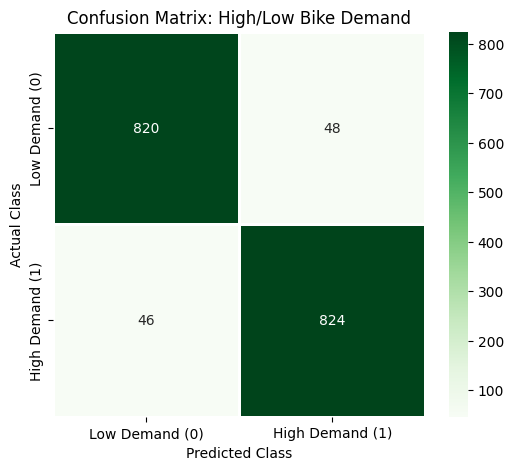

In [64]:
import seaborn as sn
labels = ['Low Demand (0)', 'High Demand (1)']

plt.figure(figsize=(6, 5)) # Adjusted size for potentially "smaller boxes"

sn.heatmap(
    cm,
    annot=True,            # Show numerical values in the boxes
    fmt='d',               # Format numbers as integers
    cmap='Greens',         # Use a green color scheme
    xticklabels=labels,    # Labels for Predicted classes (x-axis)
    yticklabels=labels,    # Labels for Actual classes (y-axis)
    linecolor='white',     # White lines separate the boxes
    linewidths=1
)

plt.title('Confusion Matrix: High/Low Bike Demand')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [65]:
custom_input_data = {
    'instant': [0], 'dteday': ['2012-09-01'], 'casual': [0], 'registered': [0], 'cnt': [0], # Dummy values for drop
    'season': [3], 'yr': [1], 'mnth': [9], 'hr': [17], 'holiday': [0], 'weekday': [5], 'workingday': [1],
    'weathersit': [1], 'temp': [0.6], 'atemp': [0.55], 'hum': [0.5], 'windspeed': [0.2]
}
custom_df = pd.DataFrame(custom_input_data)
cols_to_drop = ['instant', 'dteday', 'casual', 'registered', 'cnt']
X_custom = custom_df.drop(columns=cols_to_drop)
predicted_count_float = model.predict(X_custom)
predicted_count = int(np.round(predicted_count_float[0]))

print("\n--- Prediction Result ---")
print(f"Scenario: Rush Hour (5 PM) in Fall, Clear Weather.")
print(f"Predicted Total Bike Count (cnt): **{predicted_count}**")


--- Prediction Result ---
Scenario: Rush Hour (5 PM) in Fall, Clear Weather.
Predicted Total Bike Count (cnt): **841**


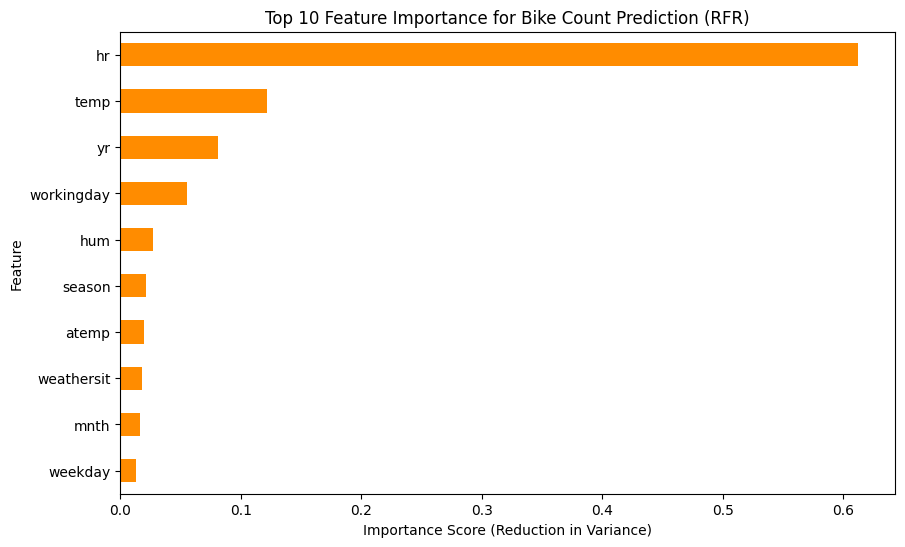

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

importance = model.feature_importances_

# Get the corresponding feature names (column names from your encoded data)
feature_names = X_custom.columns

# Combine the names and importances into a pandas Series for easy sorting
feature_importance = pd.Series(importance, index=feature_names)

# Sort the features by importance in descending order
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# --- 2. Visualize Top 10 Features ---
# Select the top 10 most important features for plotting
top_n = 10
top_feature = feature_importance_sorted.head(top_n)

plt.figure(figsize=(10, 6))
# Create a horizontal bar plot
top_feature.plot(kind='barh', color='darkorange')

plt.title(f'Top {top_n} Feature Importance for Bike Count Prediction (RFR)')
plt.xlabel('Importance Score (Reduction in Variance)')
plt.ylabel('Feature')
plt.gca().invert_yaxis() # Display the most important feature at the top
plt.show()